In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mtplot
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
#load dataset
data = pd.read_csv('diabetes.csv')

# Extracting Attributes / Features
X=data.drop(["Outcome"],axis=1)

# Extracting Target / Class Labels
y=data["Outcome"]
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
#define soc formula for DT
def get_soc_dt(D,f):
    return (2*D+1)+(2*f)

min SOC:  19  corresponding accuracy:  0.7227315168491639


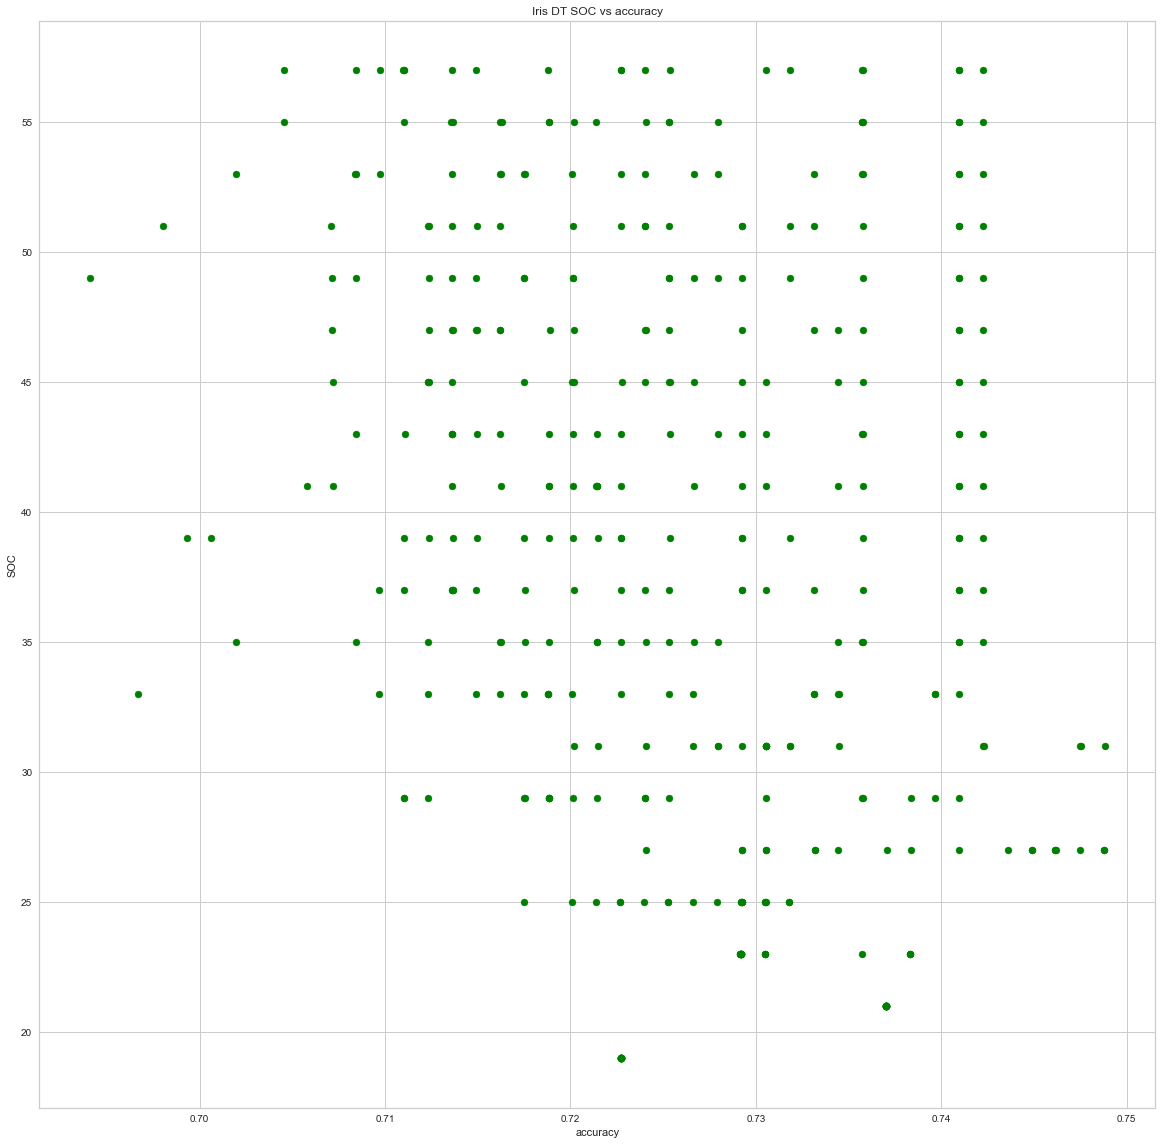

In [2]:

md=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
msl=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
list_C=[]
list_gamma=[]
min_soc = 1000000
min_gamma=100000
min_c = 100000
socs = np.array([])
accuracies=np.array([])
colors=np.array([])
colors=np.append(colors,'green')
minAccuracy=0.001
rows_list = []
for maximum_depth in md:
    for minimim_samples_leaf in msl:
        model = DecisionTreeClassifier(max_depth=maximum_depth,min_samples_leaf=minimim_samples_leaf)
        model.fit(X,y)
        soc = get_soc_dt(model.max_depth,X.shape[1])
        socs = np.append(socs,soc)
        accuracy = cross_val_score(model,X,y,cv=5,scoring='accuracy')
        accuracy=np.abs(np.mean(accuracy))
        if min_soc>soc:
            min_soc = soc
            max_acc = accuracy
            min_soc_msl= minimim_samples_leaf
            min_soc_md = maximum_depth
        accuracies = np.append(accuracies,accuracy)
        dics_val = {'SOC':soc, 'param_maximum_depth': maximum_depth, 'param_minimim_samples_leaf':minimim_samples_leaf}
        rows_list.append(dics_val)

plt.figure(figsize=(20,20))
plt.title('Iris DT SOC vs accuracy')
plt.scatter(accuracies,socs,c=colors)
plt.xlabel('accuracy')
plt.ylabel('SOC')
plt.style.use('ggplot')
print('min SOC: ',min_soc,' corresponding accuracy: ',max_acc)
plt.rcParams.update({'font.size': 22})
plt.show()
